This module will explain more on Bayesian Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

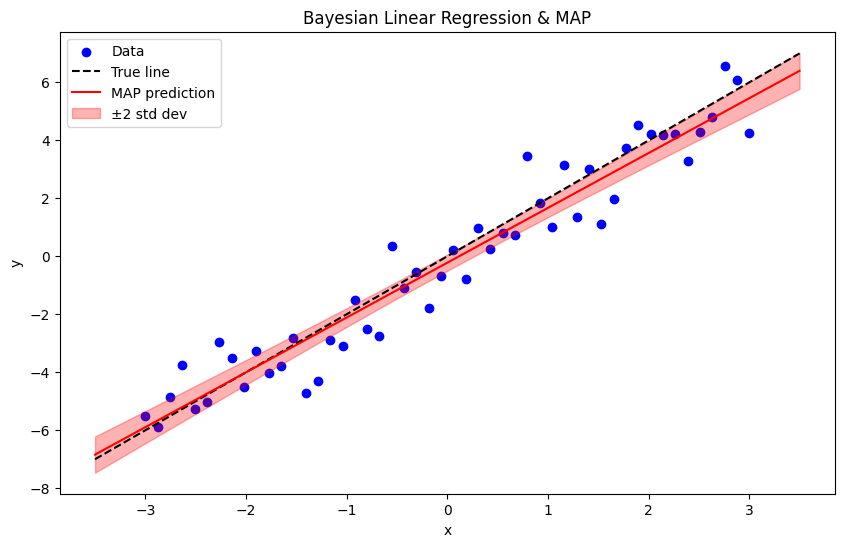

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate synthetic data
np.random.seed(42)
n_samples = 50
x = np.linspace(-3, 3, n_samples) # inputs range from -3 to 3
sigma = 1.0  # noise std
noise = np.random.normal(0, sigma, size=n_samples)
y = 2 * x + noise  # true slope = 2, intercept = 0

# 2. Prior parameters
tau = 1.0  # prior std for weights

# 3. Design matrix: column of 1s for intercept, column of x for slope
X = np.vstack([np.ones_like(x), x]).T 

# 4. Posterior covariance and mean
I = np.eye(2)
Sigma_prior_inv = I / tau**2 # prior precision (Inverse of covariance) I/covariance
Sigma_likelihood_inv = (X.T @ X) / sigma**2 # likelihood precision (XTX/sigma^2)
Sigma_post = np.linalg.inv(Sigma_prior_inv + Sigma_likelihood_inv) # posterior covariance (xTX/sigma^2 + I/covariance)^-1
mu_post = Sigma_post @ (X.T @ y) / sigma**2 # posterior mean (Sigma_post * XTy/sigma^2)

# 5. MAP estimate (posterior mean)
w_map = mu_post

# 6. Predictions and uncertainty
x_plot = np.linspace(-3.5, 3.5, 100)
X_plot = np.vstack([np.ones_like(x_plot), x_plot]).T
y_map = X_plot @ w_map
std_dev = np.sqrt(np.sum(X_plot @ Sigma_post * X_plot, axis=1))
y_upper = y_map + 2 * std_dev
y_lower = y_map - 2 * std_dev

# 7. Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x_plot, 2 * x_plot, 'k--', label='True line')
plt.plot(x_plot, y_map, 'r-', label='MAP prediction')
plt.fill_between(x_plot, y_lower, y_upper, color='red', alpha=0.3, label='±2 std dev')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bayesian Linear Regression & MAP')
plt.legend()
plt.show()
